# Lending Club Case Study

The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis 
4. Recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the csv file as DataFrame

In [2]:
df = pd.read_csv('loan.csv', sep=",", encoding = "ISO-8859-1")
data_dic = pd.read_excel('Data_Dictionary.xlsx')

/Users/amit18.singh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data understanding

In [3]:
data_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
LoanStatNew    115 non-null object
Description    116 non-null object
dtypes: object(2)
memory usage: 1.9+ KB


Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The **target variable**, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.


## Step 1:  Data Cleanup

1.1 Check the DataFrame for null / empty

In [4]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


**Above numbers are not giving clear picture. So, converting in percentage of missing value in each column** 

In [5]:
round((df.isnull().sum()/len(df.index))*100, 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Identify the columns which have 100% missing values

In [6]:
columns_for_missing_100_pc_values = df.columns[(df.isnull().sum()/len(df.index))*100 == 100]
print(columns_for_missing_100_pc_values)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [7]:
print(len(columns_for_missing_100_pc_values))

54


**In loan dataframe, there are 54 columns which are all completely empty. So, we can delete those columns from Loan dataFrame because they can't make any impact on loan application analysis**

1.2 Droping all 54 columns which are all empty

In [8]:
df = df.drop(columns_for_missing_100_pc_values, axis=1)

In [9]:
df.shape

(39717, 57)

After removing 54 columns from dataFrame, Now loan dataFrame have only 57 columns for analysis. We need to move next step fo data cleanup

In [10]:
(df.isnull().sum()/len(df.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


**There are 2 more columns which are 97.1% & 92.98% are empty/null. Need to check these columns for description**

In [11]:
df.loc[:,['next_pymnt_d','mths_since_last_record']].head()

,next_pymnt_d,mths_since_last_record
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,Jun-16,NaN


**We can remove above columns. Both column will not impact on loan application analysis**

In [12]:
df = df.drop(['mths_since_last_record','next_pymnt_d'],axis=1)

In [13]:
df.shape

(39717, 55)

**After removing 2 more columns from dataFrame, Now there are 55 columns left for analysis. We need to move next step fo data cleanup**

In [14]:
(df.isnull().sum()/len(df.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


**There is one column which is 64.66% empty/null. Need to check the column.**

In [15]:
df.loc[:,['mths_since_last_delinq']].head()

,mths_since_last_delinq
0,NaN
1,NaN
2,NaN
3,35.0
4,38.0


**We can remove this column(mths_since_last_delinq). This column will not impact on analysis because there is another column "last_pymnt_d" is available in dataFrame**
**Last month payment was received(last_pymnt_d)**

In [16]:
df = df.drop(['mths_since_last_delinq'],axis=1)

In [17]:
df.shape

(39717, 54)

**There is another column which have 32.58% of empty/null values. Need to check**

In [18]:
df.loc[:,['desc']].head()

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...



**The column "desc" contains the comments the applicant had written while applying for the loan. Although we can use some text/sentiment analysis techniques to derive new features from this column, we can avoid this column in this analysis. So, droping this column.**

In [19]:
df = df.drop(['desc'],axis=1)

In [20]:
df.shape

(39717, 53)

In [21]:
columns_for_missing_values = (df.isnull().sum()/len(df.index))*100 
print(columns_for_missing_values)

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

**There are few more columns with missing values, but we will consider them our analysis.**
**But Need to check whether some rows have a large number of missing values**

In [22]:
# Check missing values in row
df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [23]:
len(df[df.isnull().sum(axis=1) > 5].index)

0

**There is no row which have more than 5 empty/null value.** 

# Data Cleanup has been done because data looks clean by and large. Let'scheck whether all columns are in the correct format. #

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

**int_rate is object/character type. Need to convert into float64 type**

In [25]:
#df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))
df['int_rate']=df['int_rate'].str.rstrip('%').astype('float')

**"revol_util" is object/Character type. Need to convert into float64**

In [26]:
df['revol_util']=df['revol_util'].str.rstrip('%').astype('float')
#df['revol_util'] = df['revol_util'].apply(lambda x: pd.to_numeric(x.split('%')[0]))
df['revol_util']

0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
         ...  
39687    93.40
39688    74.10
39689    75.80
39690     8.10
39691    92.30
39692    36.60
39693    41.10
39694    19.50
39695     6.80
39696    23.30
39697    54.40
39698    37.60
39699    23.90
39700    16.50
39701    14.40
39702    47.10
39703     0.00
39704     7.80
39705    16.90
39706    26.30
39707    39.20
39708    48.60
39709    16.10
39710     0.60
39711    23.00
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39717, dtype: float64

In [27]:
df['emp_length'].isnull().sum(axis=0)

1075

In [28]:
df['emp_length'].isnull().sum()

1075

In [29]:
df['emp_length'].groupby(df['emp_length']).count().sum()

38642

In [30]:
df.shape

(39717, 53)

Employement length is very important parameter to analyse the loan application. In DataFrame, there is 1075 records which have employement length is empty/null. So, we can remove records which have null/empty value of emp_length

In [31]:
df = df[~df['emp_length'].isnull()]

In [32]:
# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])


# convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [33]:
df.shape

(38642, 53)

## Data Analysis

Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. 

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, going forward, we will use only the other two types of variables.


In [34]:
(df['pub_rec_bankruptcies'].isnull().sum()/len(df.index))*100 

1.8037368666218103

In [35]:
data_dic.loc[:,['Description']]

data_dic[(data_dic['LoanStatNew'] == 'pub_rec_bankruptcies')]

,LoanStatNew,Description
86,pub_rec_bankruptcies,Number of public record bankruptcies


**"pub_rec_bankruptcies" has 1.75% empty/null value. We can remove those record which have empty/ null value for "pub_rec_bankruptcies" column.
Removing record is not right choice here. SO, we must have to fill with some value. As per column name's description shows that "Number of public record bankruptcies".
So, I am going to fill 0 for every null or empty records as median value is 0 for this column.**

In [36]:
df['pub_rec_bankruptcies'].median()

0.0

In [37]:
x = df['pub_rec_bankruptcies'].median()
df["pub_rec_bankruptcies"].fillna(x, inplace=True)

In [38]:
df['pub_rec_bankruptcies'].count()

38642

In [39]:
(df['revol_util'].isnull().sum()/len(df.index))*100 

0.1216293152528337

In [40]:
df['revol_util'].isnull().sum()

47

In [41]:
df['revol_util'].median()

49.5

**revol_util is also important data for analysis. But, this column has 0.12% as null/empty values. So, we have to fill 
with median value of this column. So, this column will be more effective for analysis. In "revol_util" column, filling value should be decided by Business. In few cases, it should be 0 or take median value. I am considering myself as business decison maker & decided to go with median value to replace the empty/null value. **

In [42]:
x = df['revol_util'].median()
df["revol_util"].fillna(x, inplace=True)

In [43]:
df["revol_util"].median()

49.5

**Zipcode is string type in dataset & last 2 digit has been hashed with x.
I am considering that it is perpusely done it. So, I am not convering this column.**

In [44]:
data_dic[data_dic['LoanStatNew'].isin(list(df))]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
6,application_type,Indicates whether the loan is an individual ap...
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
13,delinq_2yrs,The number of 30+ days past-due incidences of ...
14,delinq_amnt,The past-due amount owed for the accounts on w...
16,dti,A ratio calculated using the borrower’s total ...


In [45]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [46]:
behavioural_columns = ['id','member_id','url','title','zip_code',
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"];

In [47]:
len(behavioural_columns)

26

In [48]:
# let's now remove the behaviour variables from analysis
df = df.drop(behavioural_columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 27 columns):
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_plan                    38642 non-null object
purpose                       38642 non-null object
addr_s

In [49]:
df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
5        Dec-11
6        Dec-11
7        Dec-11
8        Dec-11
9        Dec-11
10       Dec-11
11       Dec-11
12       Dec-11
13       Dec-11
14       Dec-11
15       Dec-11
16       Dec-11
17       Dec-11
18       Dec-11
19       Dec-11
20       Dec-11
21       Dec-11
22       Dec-11
23       Dec-11
24       Dec-11
25       Dec-11
26       Dec-11
27       Dec-11
28       Dec-11
29       Dec-11
          ...  
39687    Aug-07
39688    Aug-07
39689    Jul-07
39690    Jul-07
39691    Jul-07
39692    Jul-07
39693    Jul-07
39694    Jul-07
39695    Jul-07
39696    Jul-07
39697    Jul-07
39698    Jul-07
39699    Jul-07
39700    Jul-07
39701    Jul-07
39702    Jul-07
39703    Jul-07
39704    Jul-07
39705    Jul-07
39706    Jul-07
39707    Jul-07
39708    Jul-07
39709    Jul-07
39710    Jul-07
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 3

In [50]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

Next, let's have a look at the first target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [51]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [52]:
df['loan_status'] = df['loan_status'].astype('category')

In [53]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

As per above result, Mostly loanes are fully paid. 'Current' & 'Fully paid' category cannot comes under default category.
So, Filter loan category 'currrent' from DataFrame.

In [54]:
df = df[(df['loan_status'] != 'Current')]

In [55]:
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current            0
Name: loan_status, dtype: int64

In [56]:
# converting loan_status to Integer type(0 or 1) for 'Fully Paid' & 'Charged Off'.
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [57]:
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

Next, let's start with univariate analysis and then move to bivariate analysis.

## Univariate Analysis

First, let's look at the overall default rate.

In [58]:
# default rate
round(df['loan_status'].mean(), 2)*100

14.000000000000002

Now, I can say that overall default rate is about 14%.  

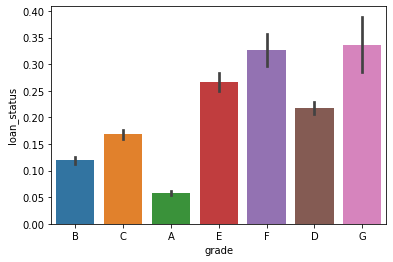

In [59]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [60]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    props = df.groupby(cat_var)['loan_status'].value_counts(normalize=True).unstack()
    props.plot(kind='bar', stacked='True') 
    plt.title(cat_var+' VS loan Amount')
    plt.legend(('Fully Paid', 'Default'))

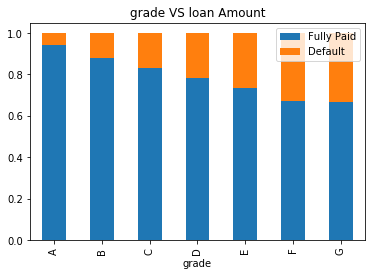

In [61]:
# compare default rates across grade of loan
plot_cat('grade')

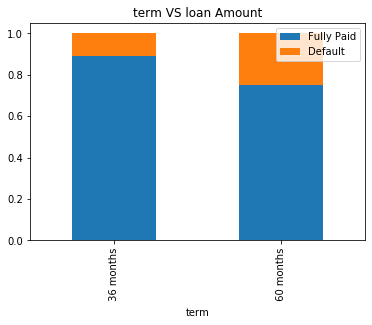

In [62]:
# term: 60 months loans default more than 36 months loans
plot_cat('term')

<Figure size 1152x432 with 0 Axes>

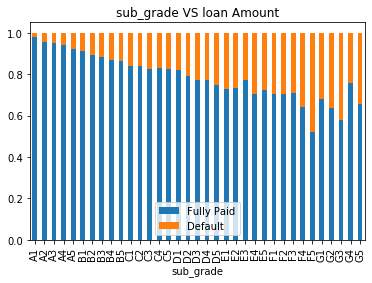

In [63]:
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

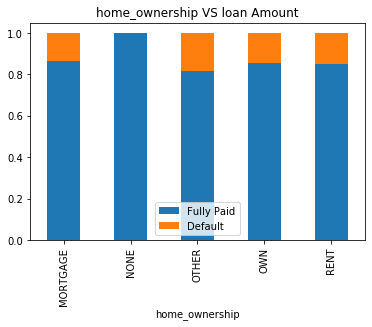

In [64]:
# home ownership: not a great discriminator
plot_cat('home_ownership')

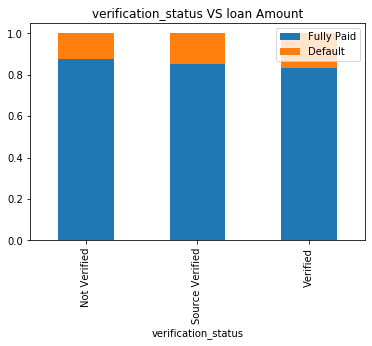

In [65]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plot_cat('verification_status')

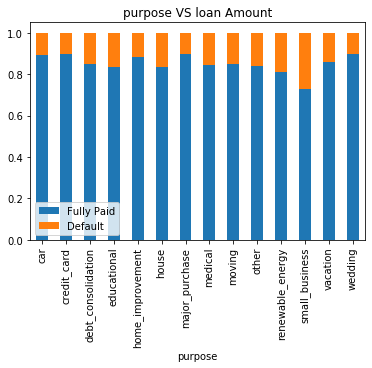

In [66]:
# purpose: small business loans defualt the most, then renewable energy and education
plot_cat('purpose')

In [67]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [68]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [69]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

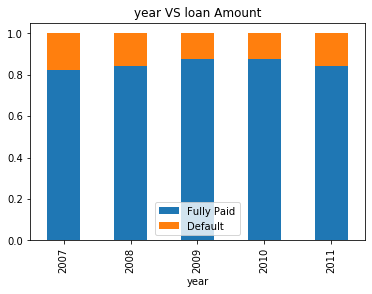

In [70]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plot_cat('year')

<Figure size 1800x432 with 0 Axes>

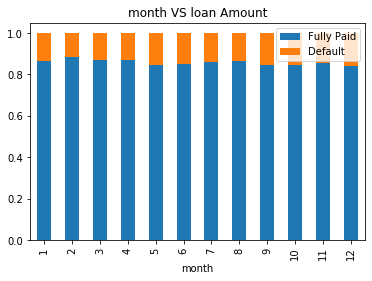

In [71]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(25, 6))
plot_cat('month')

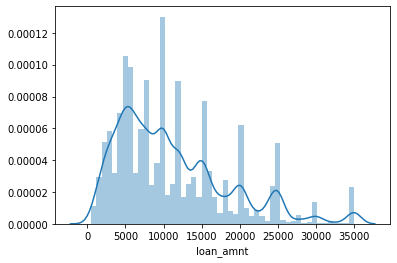

In [72]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

In [73]:
df['loan_amnt'].min()

500

In [74]:
df['loan_status'].max()

1

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [75]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))


In [76]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

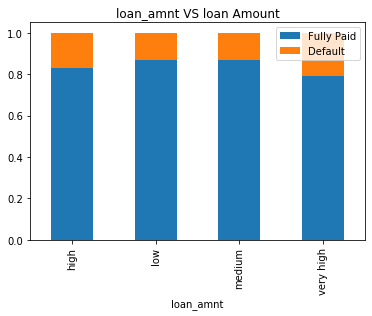

In [77]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
plot_cat('loan_amnt')

In [78]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

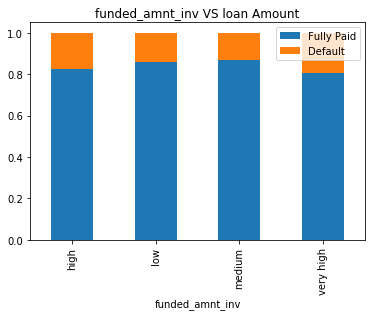

In [79]:
# funded amount invested
plot_cat('funded_amnt_inv')

In [80]:
df['int_rate'].max()

24.4

In [81]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    elif n > 15 and n <=20:
        return 'high'
    else:
        return 'very high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

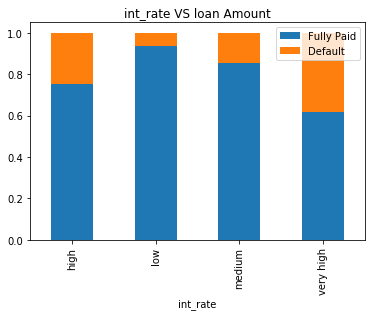

In [82]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plot_cat('int_rate')

Check for Debt to Income ratio

In [83]:
maxDTI = round(df['dti'].max(),2)
minDTI = round(df['dti'].min(),2)
meanDTI = round(df['dti'].mean(),2)
medianDTI = round(df['dti'].median(),2)
print(maxDTI , minDTI , meanDTI, medianDTI)

29.99 0.0 13.28 13.38


In [84]:
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

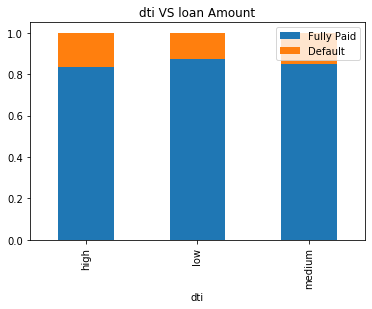

In [85]:
# high dti means higher default rates, as expected
plot_cat('dti')

Check for Funded amount

In [86]:
df['funded_amnt'].median()

9600.0

In [87]:
# Maximum value is 35000, Minimum is 500 & Median is 9600
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

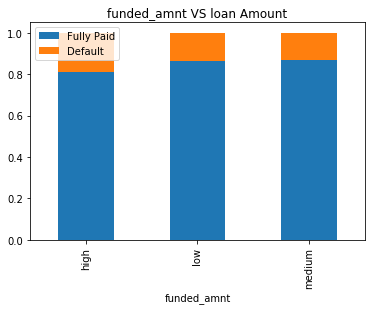

In [88]:
# Plot funded amount graph against loan status
plot_cat('funded_amnt')


Checking for installments

In [89]:
df['installment'].median()

280.0

In [90]:
# Maximum value is 1305.19, Minimum is 15.69 & Median is 280
# installments(The monthly payment owed by the borrower if the loan originates.)
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=700:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

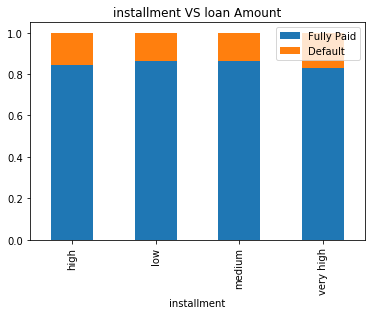

In [91]:
# the higher the installment amount(EMI), the higher the default rate
plot_cat('installment')

In [92]:
df['annual_inc'].max()

6000000.0

In [93]:
# Annual Income - Maximum value = 6000000.0, Minimum = 4000 & Median = 60000
# Annual Income (The self-reported annual income provided by the borrower during registration.)
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

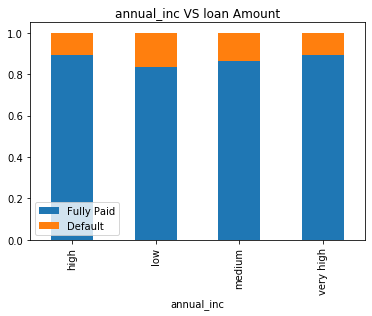

In [94]:
plot_cat('annual_inc')

Check for Employment length

In [95]:
df['emp_length'].median()

4.0

In [96]:
# Emp Length - Maximum value = 10, Minimum = 1 & Median = 4
# Emp_Length (Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.)

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))


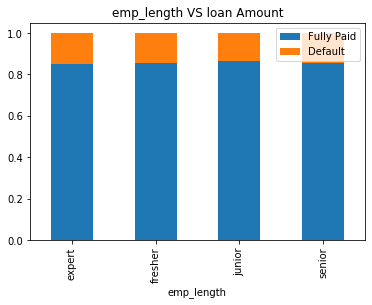

In [97]:
# emp_length and default rate are not much a predictor of default
plot_cat('emp_length')

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

<Figure size 1800x432 with 0 Axes>

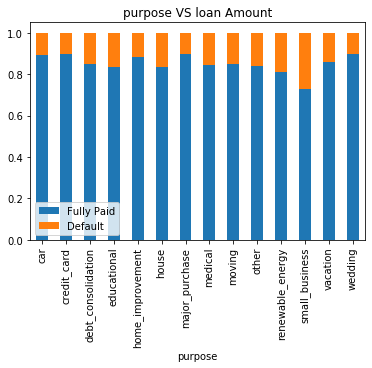

In [98]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(25, 6))
plot_cat('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate

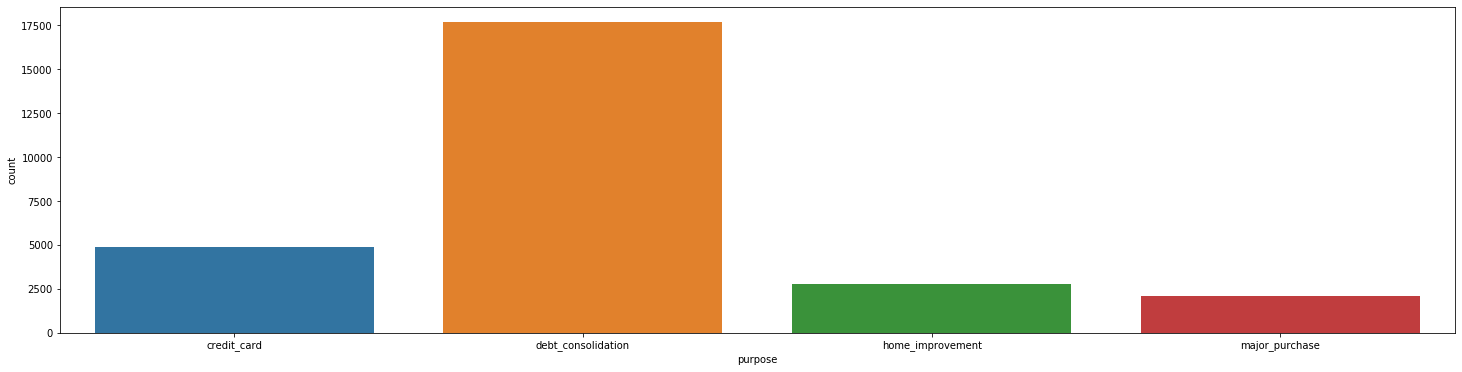

In [879]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay other debts), then credit card, major purchase etc.
plt.figure(figsize=(25, 6))
sns.countplot(x='purpose', data=df)
plt.show()

In [880]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

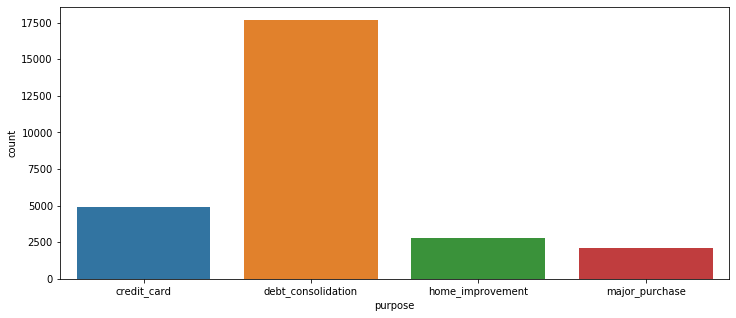

In [881]:
# plotting number of loans by purpose 
plt.figure(figsize=(12, 5))
sns.countplot(x=df['purpose'])
plt.show()

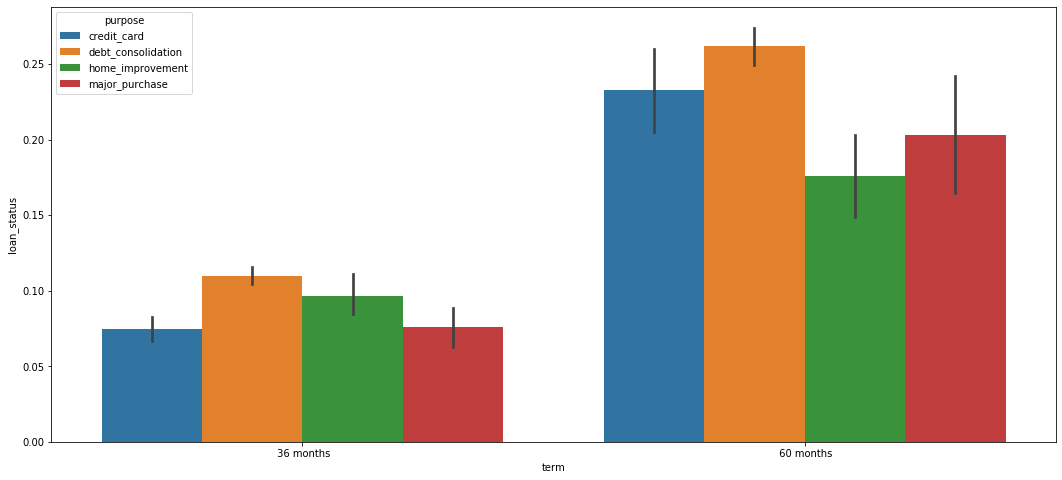

In [882]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[18, 8])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

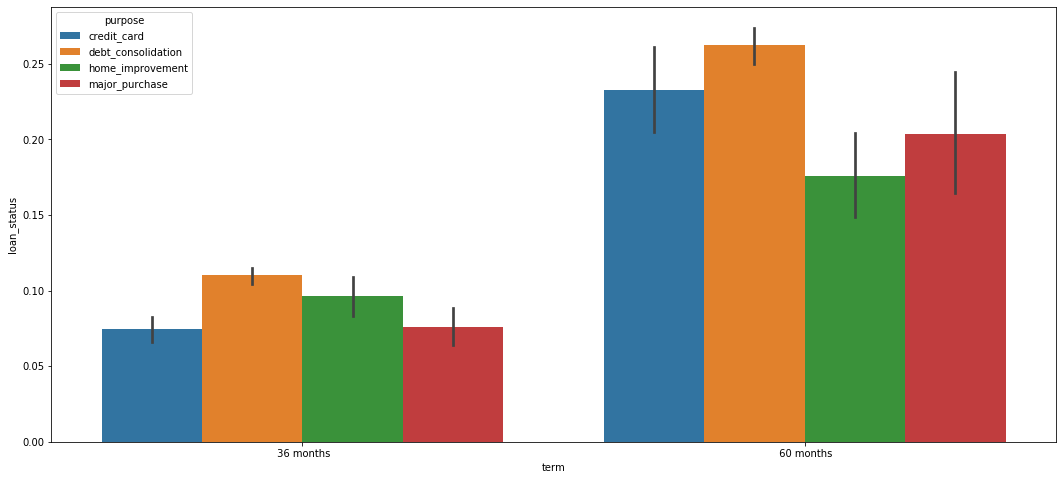

In [883]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(18, 8))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()
    
#Check the graph plot & match the above graph to verify this graph ploting function
plot_segmented('term')

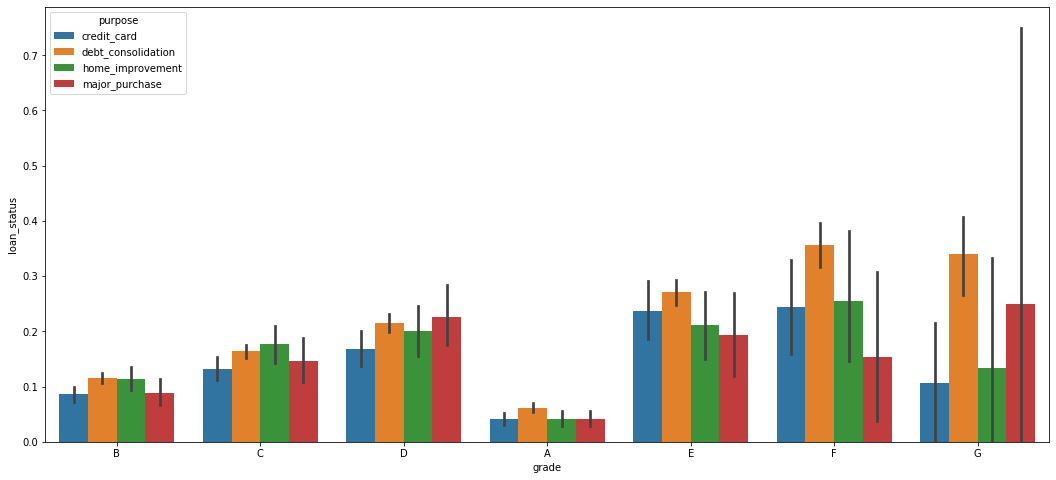

In [884]:
# grade of loan
plot_segmented('grade')

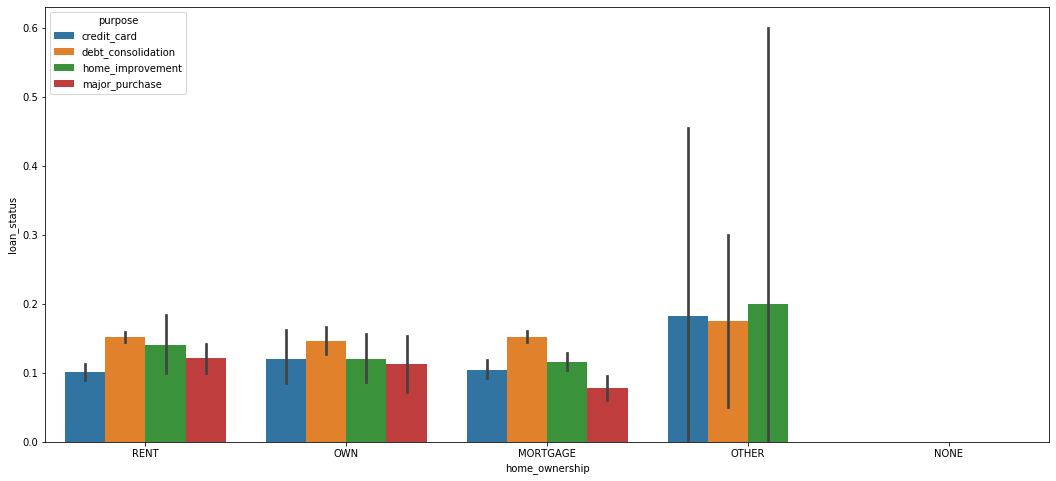

In [885]:
# home ownership
plot_segmented('home_ownership')

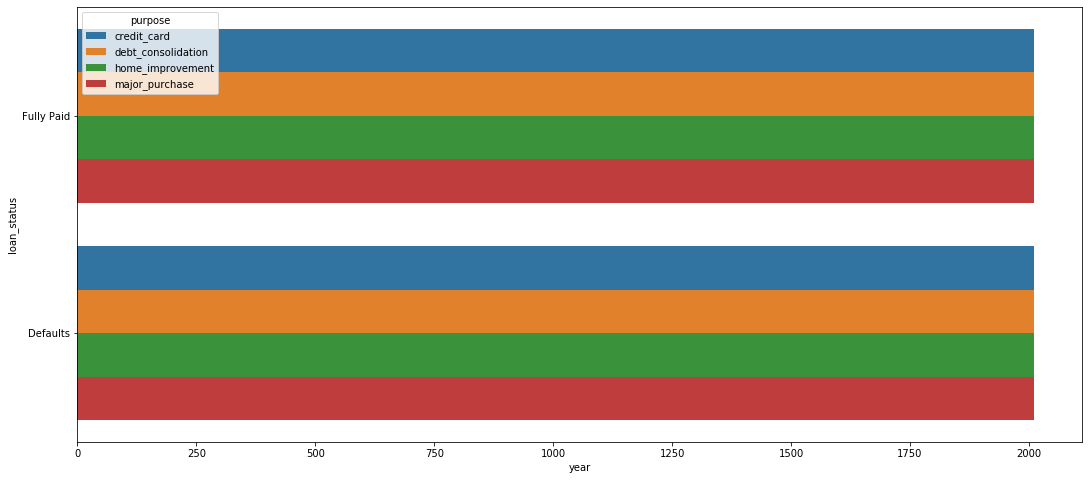

In [702]:
# year
plot_segmented('year')

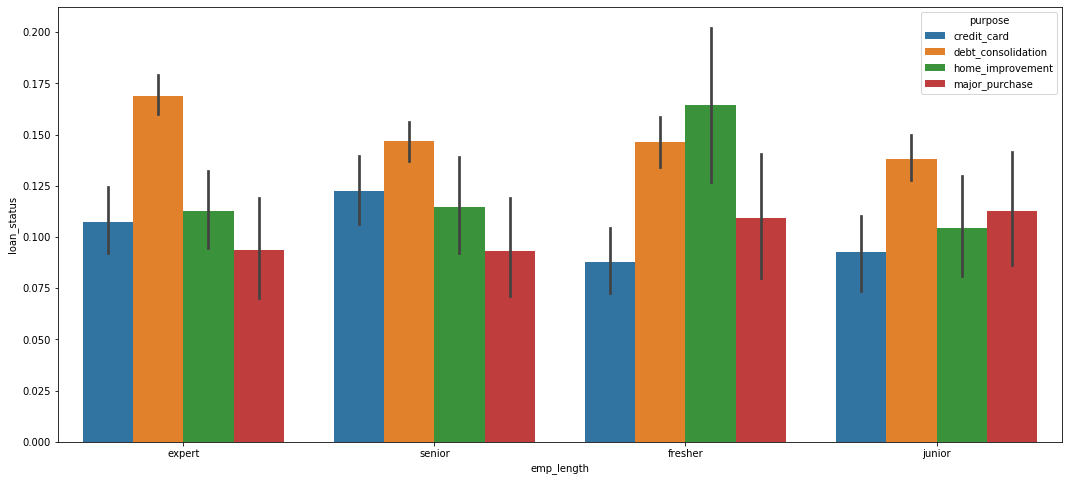

In [886]:
# emp_length
plot_segmented('emp_length')

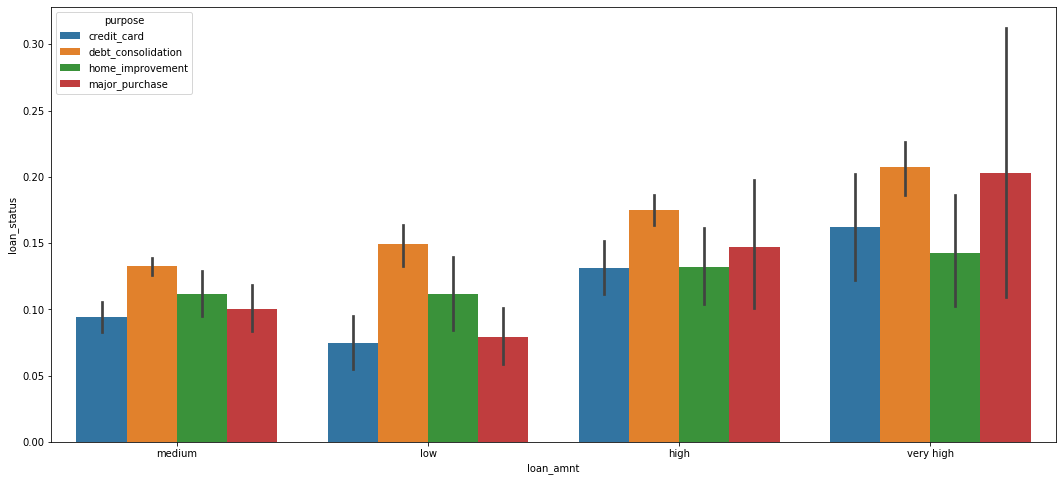

In [887]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

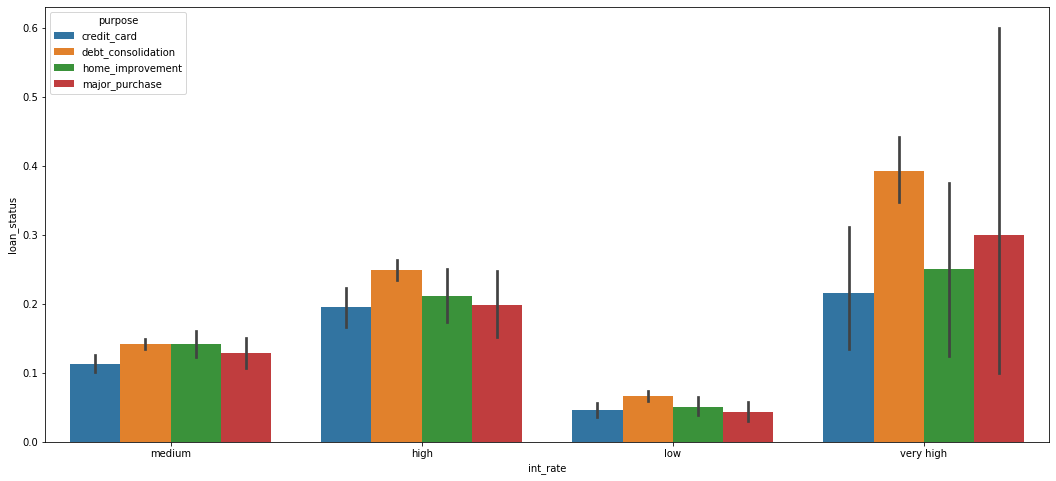

In [888]:
# interest rate
plot_segmented('int_rate')

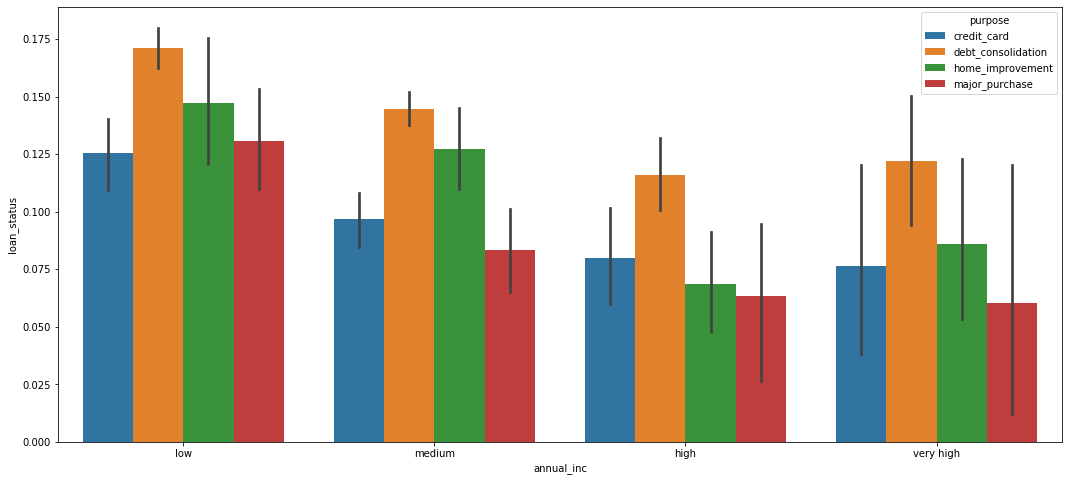

In [889]:
# annual income
plot_segmented('annual_inc')

Segmented plot for debt to income

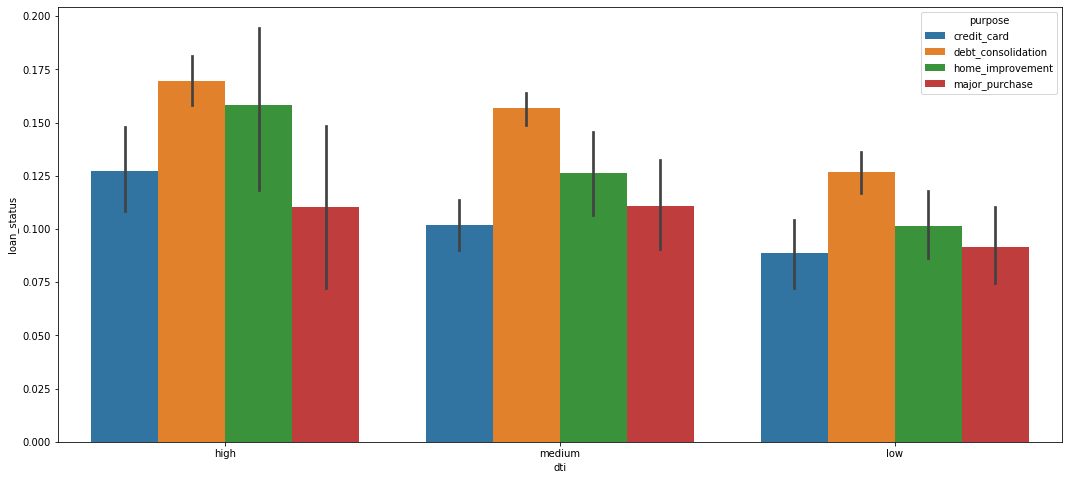

In [890]:
# debt to income ratio
plot_segmented('dti')

In [ ]:
# installment
plot_segmented('installment')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

Let's see an example using annual_inc as the categorical variable.

In [631]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [632]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'month', 'year'],
      dtype='object')

In [633]:
df[(df['dti']=='high') & (df['int_rate'] == 'very high') & (df['installment'] == 'very high') & (df['emp_length'] == 'fresher')]['loan_status']

3006    1
5653    1
Name: loan_status, dtype: int64

In [634]:
df['verification_status'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

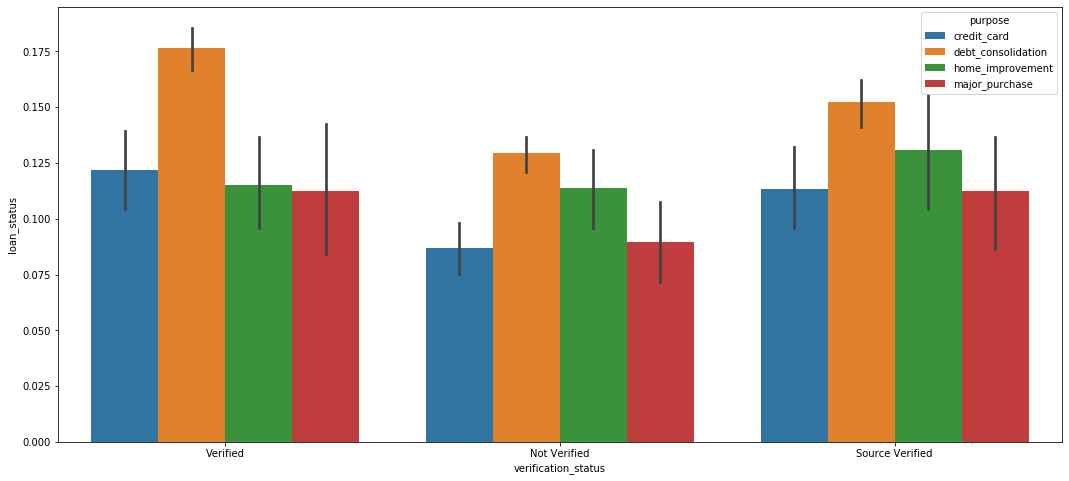

In [635]:
plot_segmented('verification_status')

In [636]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

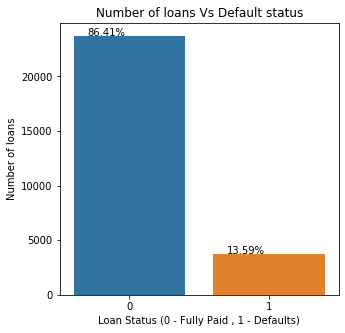

In [637]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=df)
plt.xlabel('Loan Status (0 - Fully Paid , 1 - Defaults)')
plt.ylabel('Number of loans')
plt.title('Number of loans Vs Default status')
total = len(df)*1.
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

In [638]:
df['loan_status'] = df['loan_status'].apply(lambda x: 'Fully Paid' if x== 0 else 'Defaults')
# converting loan_status to integer type
#df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

<Figure size 864x1080 with 0 Axes>

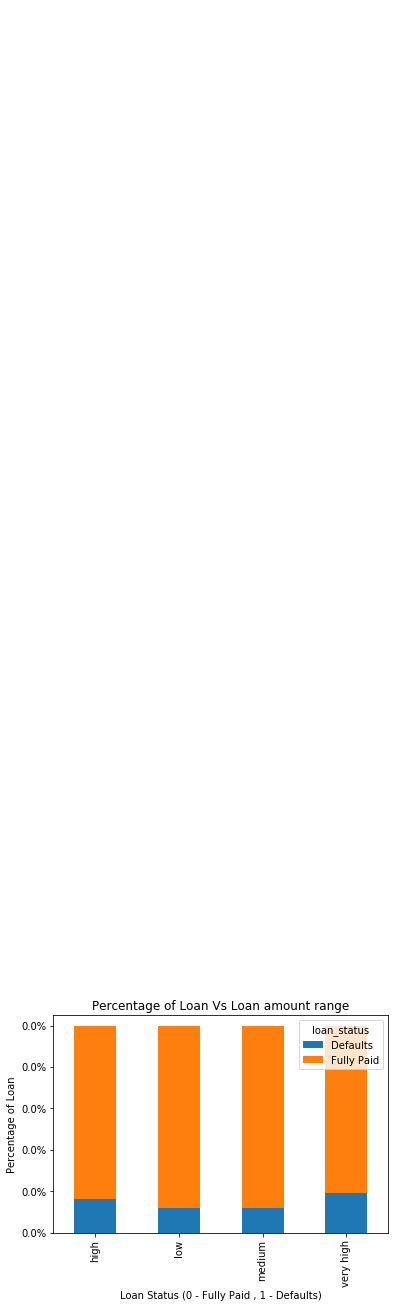

In [639]:
plt.figure(figsize=(12,15))
ax = df.groupby('loan_amnt')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
plt.xlabel('Loan Status (0 - Fully Paid , 1 - Defaults)')
plt.ylabel('Percentage of Loan')
plt.title('Percentage of Loan Vs Loan amount range')
total = len(df)*1.

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.show()

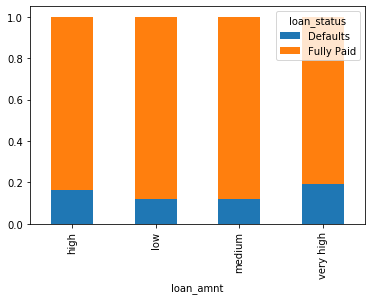

In [640]:
props = df.groupby("loan_amnt")['loan_status'].value_counts(normalize=True).unstack()

props.plot(kind='bar', stacked='False')

In [ ]:
props = df.groupby("loan_amnt")['loan_status'].value_counts(normalize=True).unstack()
plt.xlabel('Loan Status (0 - Fully Paid , 1 - Defaults)')
plt.ylabel('Percentage of Loan')
plt.title('Percentage of Loan Vs Loan amount range')
total = len(props)*1.

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = props.set_yticklabels(map('{:.1f}%'.format, 100*props.yaxis.get_majorticklocs()/total))

for p in props.patches:
        props.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.show()

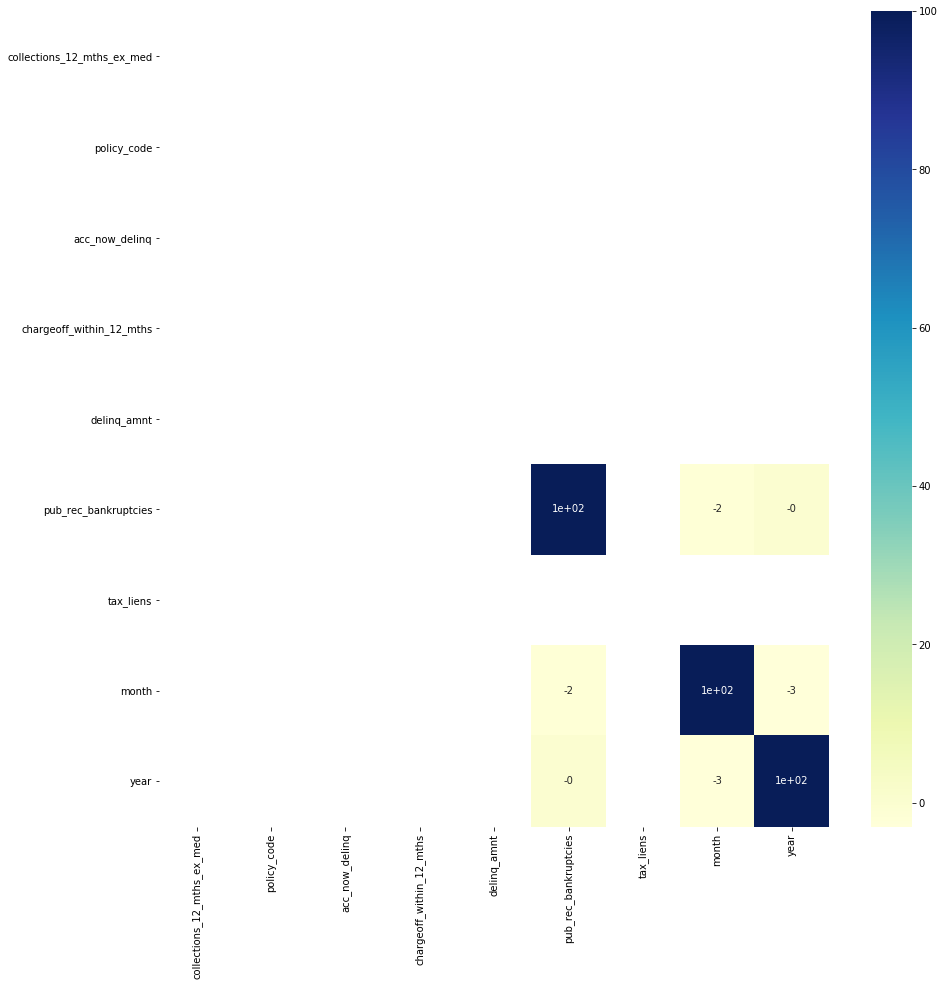

In [642]:
plt.figure(figsize=(15,15))
sns.heatmap(round(df.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()